# Import pandas as pd and read the csv file as a dataframe

In [48]:
# import pandas as pd and read the csv file as a dataframe
import pandas as pd
data =  pd.read_csv('H:\Machine learning\chest.csv')

# Convert the diagnosis column to boolean values. M stands for malignant and B stands for benign

In [35]:
#convert the diagnosis column to boolean values. M stands for malignant and B stands for benign
data2 = pd.get_dummies(data['diagnosis'])
data = pd.concat([data, data2], axis=1).reindex(data.index)

# Set X as the data to be used for training and y as the data to be predicted. Here, we will predict if the tumour is malignant or not. 

In [ ]:
#set X as the data to be used for training and y as the data to be predicted. Here, we will predict if the tumour is malignant or not. 
y = data['M']
X = data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

# Divide the data into training and testing groups

In [43]:
#divide the data into training and testing groups
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

B    357
M    212
Name: diagnosis, dtype: int64

# Fit the training data into a logistic regression model

In [38]:
#fit the training data into a logistic regression model
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, y_train)

# Predict the data

In [39]:
#predict the data
predictions = lm.predict(X_test)

# Observe the accuracy of prediction.

In [44]:
#observe the accuracy of prediction.
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       117
           1       0.94      0.86      0.90        71

    accuracy                           0.93       188
   macro avg       0.93      0.91      0.92       188
weighted avg       0.93      0.93      0.92       188

[[113   4]
 [ 10  61]]


# Visualizations

In [51]:
import matplotlib.pyplot as plt

#### Texture vs Radius graph

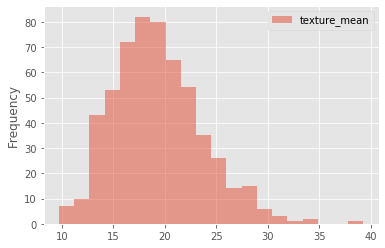

In [52]:
plt.style.use('ggplot')
data.plot.hist(x='radius_mean', y='texture_mean',alpha=0.5, bins=20)

#### KDE plot of Symmetry

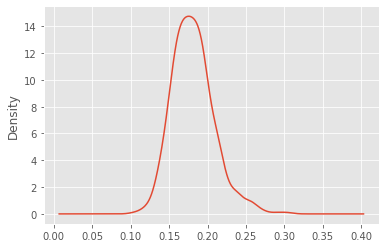

In [57]:
data['symmetry_mean'].plot.kde()

#### Area vs Smoothness graph

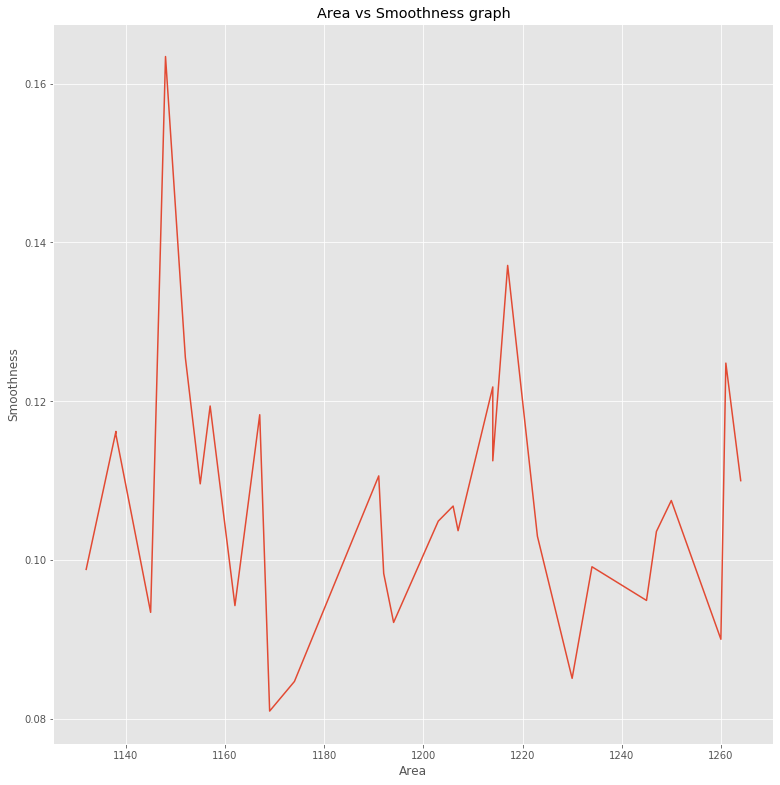

In [70]:
import numpy as np
figure = plt.figure(figsize=(10,10))
axes = figure.add_axes([0,0,1,1])
axes.set_xlabel('Area')
axes.set_ylabel('Smoothness')
axes.set_title('Area vs Smoothness graph')
array1 = np.array(data['area_mean'])
array2 = np.array(data['smoothness_mean'])
sorted_array1 = np.sort(array1)

x = sorted_array1[500:530]
y = array2[500:530]
axes.plot(x,y)